In [ ]:
#Loading Necessary Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

FileNotFoundError: ignored

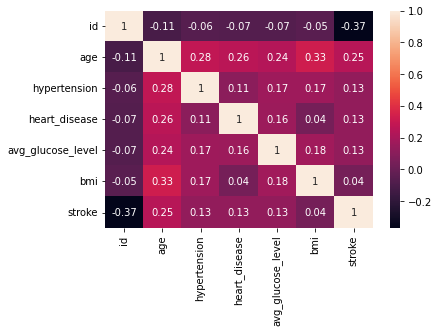

In [ ]:
matrix = stroke_data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

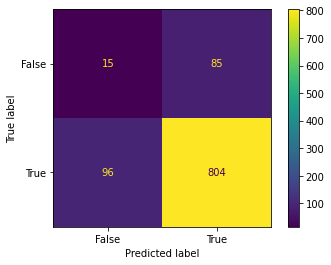

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,3,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,4,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,5107,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5108,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5109,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
missing_value = ["N/A" , "na", np.nan]
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv' , na_values=missing_value)

In [ ]:
stroke_data['bmi'] = stroke_data['bmi'].replace(np.nan, 0)

In [ ]:
stroke_data['bmi'] = stroke_data['bmi'].replace(np.nan, 0)

In [ ]:
stroke_data = stroke_data.dropna()

In [ ]:
def tran_gender(x):
    if x== 'Male':
        return 1
    if x== 'Female':
        return 0

In [ ]:
stroke_data['Trans_gender']=stroke_data['gender'].apply(tran_gender)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Trans_gender
0,1,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,0.0
2,3,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,4,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.0
4,5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0,0.0
5106,5107,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0.0
5107,5108,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0.0
5108,5109,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1.0


In [ ]:
import matplotlib.pyplot as plt

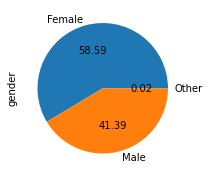

In [ ]:
stroke_data['gender'].value_counts().plot.pie(figsize =(3,3), autopct="%0.2f")

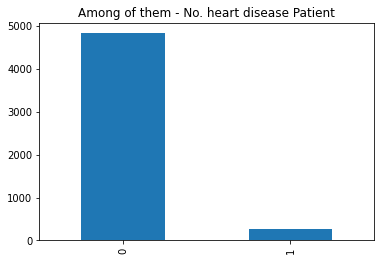

In [ ]:
stroke_data['heart_disease'].value_counts().plot.bar(title="Among of them - No. heart disease Patient")

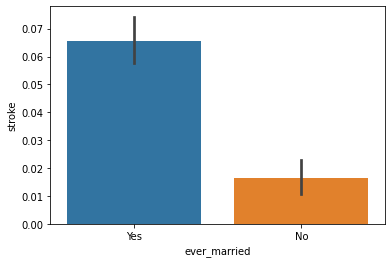

In [ ]:
sns.barplot(x = 'ever_married',y = 'stroke',data = stroke_data)
plt.show()

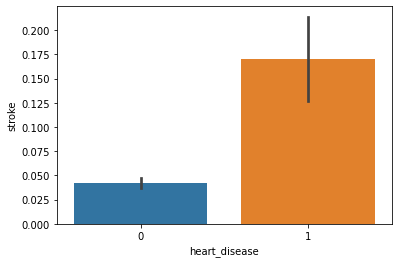

In [ ]:
sns.barplot(x = 'heart_disease', y = 'stroke',data = stroke_data)
plt.show()

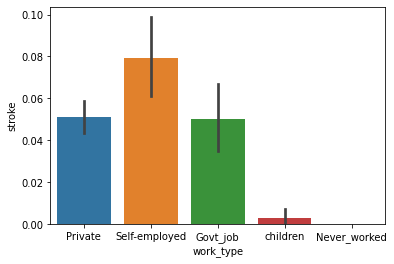

In [ ]:
sns.barplot(x = 'work_type',y = 'stroke',data = stroke_data)
plt.show()

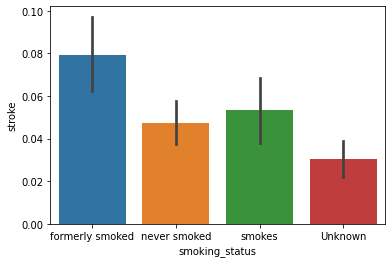

In [ ]:
sns.barplot(x = 'smoking_status',y = 'stroke',data = stroke_data)
plt.show()

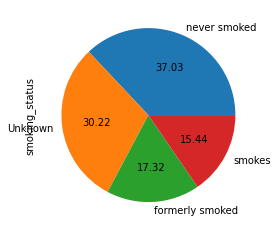

In [ ]:
stroke_data['smoking_status'].value_counts().plot.pie(figsize =(4,4), autopct="%0.2f")

In [ ]:
def tran_evermarried(x):
    if x== 'Yes':
        return 1
    if x== 'No':
        return 0




In [ ]:
     stroke_data ['Trans_evermarried']=stroke_data['ever_married'].apply(tran_evermarried)

In [ ]:
def tran_smoking_status(x):
    if x== 'formerly smoked':
        return 1
    if x== 'smokes' :
        return 1
    if x== 'never smoked':
        return 0
    if x== 'Unknown':
        return 0


In [ ]:
stroke_data['Trans_smoking_status']=stroke_data['smoking_status'].apply(tran_smoking_status)

In [ ]:
def tran_Residence_type(x):
    if x== 'Urban':
        return 1
    if x== 'Rural':
        return 0

In [ ]:
stroke_data['Trans_Residence_type']=stroke_data['Residence_type'].apply(tran_Residence_type)

In [ ]:
def tran_work_type(x):
    if x== 'Private':
        return 1
    if x== 'Self-employed':
        return 1
    if x== 'Govt_job':
        return 1
    if x== 'children':
        return 0


In [ ]:
 stroke_data['Trans_work_type']=stroke_data['work_type'].apply(tran_work_type)

In [ ]:
#Checking how many data are having stroke patient
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke_data.drop(
labels= ["id","gender","ever_married", "work_type", "Residence_type", "smoking_status"], axis=1,
    inplace= False
)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Trans_gender,Trans_evermarried,Trans_smoking_status,Trans_Residence_type,Trans_work_type
0,67.0,0,1,228.69,36.6,1,1.0,1,1,1,1.0
1,61.0,0,0,202.21,0.0,1,0.0,1,0,0,1.0
2,80.0,0,1,105.92,32.5,1,1.0,1,0,0,1.0
3,49.0,0,0,171.23,34.4,1,0.0,1,1,1,1.0
4,79.0,1,0,174.12,24.0,1,0.0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0.0,0,0.0,1,0,1,1.0
5106,81.0,0,0,125.20,40.0,0,0.0,1,0,1,1.0
5107,35.0,0,0,82.99,30.6,0,0.0,1,0,0,1.0
5108,51.0,0,0,166.29,25.6,0,1.0,1,1,0,1.0


In [ ]:
Train_stroke_data = stroke_data[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi','Trans_gender', 'Trans_evermarried',
       'Trans_smoking_status', 'Trans_Residence_type', 'Trans_work_type', 'stroke']]

In [ ]:
stroke_data=stroke_data.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
#Spliting the features and target
x = Train_stroke_data.drop(columns ='stroke', axis = 1)
y = Train_stroke_data['stroke']

In [ ]:
print(x)

       age  hypertension  heart_disease  avg_glucose_level   bmi  \
0     67.0             0              1             228.69  36.6   
1     61.0             0              0             202.21   0.0   
2     80.0             0              1             105.92  32.5   
3     49.0             0              0             171.23  34.4   
4     79.0             1              0             174.12  24.0   
...    ...           ...            ...                ...   ...   
5105  80.0             1              0              83.75   0.0   
5106  81.0             0              0             125.20  40.0   
5107  35.0             0              0              82.99  30.6   
5108  51.0             0              0             166.29  25.6   
5109  44.0             0              0              85.28  26.2   

      Trans_gender  Trans_evermarried  Trans_smoking_status  \
0              1.0                  1                     1   
1              0.0                  1                    

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y ,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(5087, 10) (3560, 10) (1527, 10)


In [ ]:
np.isnan(Train_stroke_data.any()) #and gets False
np.isfinite(Train_stroke_data.all()) #and gets True

age                     True
hypertension            True
heart_disease           True
avg_glucose_level       True
bmi                     True
Trans_gender            True
Trans_evermarried       True
Trans_smoking_status    True
Trans_Residence_type    True
Trans_work_type         True
stroke                  True
dtype: bool

In [ ]:
model = LogisticRegression()

In [ ]:
# Trainning Logistic Regression Model
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Train_stroke_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,Trans_gender,Trans_evermarried,Trans_smoking_status,Trans_Residence_type,Trans_work_type,stroke
0,67.0,0,1,228.69,36.6,1.0,1,1,1,1.0,1
1,61.0,0,0,202.21,0.0,0.0,1,0,0,1.0,1
2,80.0,0,1,105.92,32.5,1.0,1,0,0,1.0,1
3,49.0,0,0,171.23,34.4,0.0,1,1,1,1.0,1
4,79.0,1,0,174.12,24.0,0.0,1,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0.0,0.0,1,0,1,1.0,0
5106,81.0,0,0,125.20,40.0,0.0,1,0,1,1.0,0
5107,35.0,0,0,82.99,30.6,0.0,1,0,0,1.0,0
5108,51.0,0,0,166.29,25.6,1.0,1,1,0,1.0,0


In [ ]:
# Accuracy trainning
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
# Accuracy trainning
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Test data : ' , training_data_accuracy)

Accuracy on Test data :  0.951123595505618


In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ' , test_data_accuracy)

Accuracy on Test data :  0.9508840864440079


In [ ]:
#Make prediction on the test set
pred = model.predict(x_test)

#calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
F1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy on Test data : ', test_data_accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',F1)

Accuracy on Test data :  0.9508840864440079
Precision:  0.5
Recall:  0.013333333333333334
F1:  0.025974025974025976


In [ ]:
input_data =(21,0,1,228.69,36.6,1,1,1,1,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


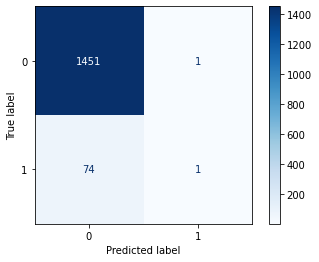

In [ ]:
y_pred =model.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
# Trainning Logistic Regression Model
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Trainning Logistic Regression Model
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Make prediction on the test set
pred = KNN.predict(x_test)

#calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
F1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy on Test data : ', test_data_accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',F1)

Accuracy on Test data :  0.9423706614276359
Precision:  0.15789473684210525
Recall:  0.04
F1:  0.06382978723404255


In [ ]:
x_test_prediction = KNN.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9423706614276359


In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = KNN.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Make prediction on the test set
pred = KNN.predict(x_test)

#calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
F1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy on Test data : ', test_data_accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',F1)

Accuracy on Test data :  0.9423706614276359
Precision:  0.15789473684210525
Recall:  0.04
F1:  0.06382978723404255


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


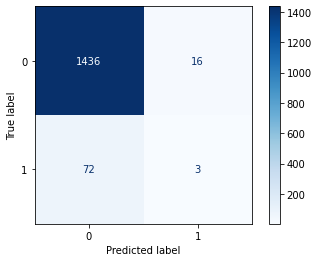

In [ ]:
y_pred =KNN.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(KNN, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
NB = GaussianNB()

In [ ]:
NB.fit(x_train, y_train)

GaussianNB()

In [ ]:
NB.score(x_test, y_test)

0.8362802881466929

In [ ]:
NB.score(x_train, y_train)

0.8317415730337079

In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = NB.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
#Make prediction on the test set
pred = NB.predict(x_test)

#calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
F1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy on Test data : ', test_data_accuracy)
print('Precision:',precision)
print('Recall: ',recall)
print('F1: ',F1)

Accuracy on Test data :  0.9423706614276359
Precision: 0.16730038022813687
Recall:  0.5866666666666667
F1:  0.2603550295857988


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


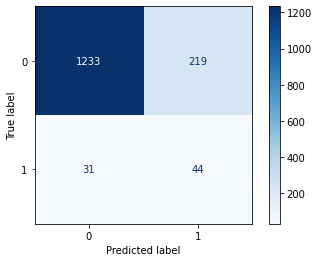

In [ ]:
y_pred =NB.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(NB, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
RFR.score(x_test,y_test)

-0.016070567493112753

In [ ]:
RFR.score(x_train,y_train)

0.8587792465255855

In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = RFR.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0.]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y_pred =RFR.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RFR, x_test, y_test, cmap=plt.cm.Blues)
plt.show()


ValueError: ignored

In [ ]:
y_pred =RFR.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RFR, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

ValueError: ignored

In [ ]:
SVM = SVC()

In [ ]:
SVM.fit(x_train, y_train)

SVC()

In [ ]:
SVM.score(x_test,y_test)

0.9508840864440079

In [ ]:
SVM.score(x_train,y_train)

0.951123595505618

In [ ]:
input_data =(21,0,0,77.42,24.8,1,1,0,0,1)
#change the input into numpy data
input_data_as_a_numpy_array = np.asarray(input_data)

#Reshape numpy data only for 1 data
input_data_reshaped = input_data_as_a_numpy_array.reshape(1, -1)

prediction = SVM.predict(input_data_reshaped)

print (prediction)

if (prediction[0] == 0):
    print ('The person never had stroke')
else:
    print ('The person had a stroke')

[0]
The person never had stroke


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Make prediction on the test set
pred = SVM.predict(x_test)

#calculating precision and reall
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
F1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy on Test data : ', test_data_accuracy)
print('Precision:',precision)
print('Recall: ',recall)
print('F1: ',F1)

Accuracy on Test data :  0.9423706614276359
Precision: 0.0
Recall:  0.0
F1:  nan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-150-076eba9f1b75>:7: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (precision * recall) / (precision + recall)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


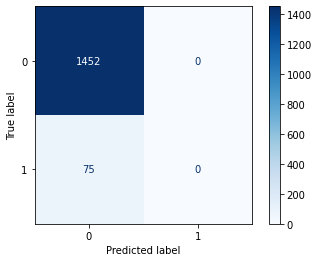

In [ ]:
y_pred =SVM.predict(x_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(SVM, x_test, y_test, cmap=plt.cm.Blues)
plt.show()